# Twitter - Text Modelling - Clusters/Topics etc

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
#for ipython
%matplotlib inline

#pre-processing tweet

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

#df01 = pd.read_csv('applepay_tweets1.csv')
#df02 = pd.read_csv('applepay_tweets2.csv')
#df = df01.append(df02, ignore_index=True)
df = pd.read_csv('accounts bank OR banking -recruit -recruitment -career -job -hiring_tweets.csv')

df0 = df[df.Tweet_Text.str.contains("http") == False]
df1 = df0[df0.Tweet_Text.str.contains(".com") == False]

tweets = list(df1.Tweet_Text.drop_duplicates())

#tweet_processor = TweetPreprocessor()
#tknzr = TweetTokenizer()
#nltk.download('stopwords')
#stop = stopwords.words('english')
#stop += ['<hashtag>', '<url>', '<allcaps>', '<number>', '<user>', '<repeat>', '<elong>', 'websummit', 'battery', 'song']
#outtweets = []
#for tweet in tweets:
#    parts = tknzr.tokenize(tweet_processor.preprocess(tweet))
#    clean = [i.encode('ascii', 'ignore') for i in parts if i not in stop]
#    outtweets.append(clean)
tknzr = TweetTokenizer()
tokens = tknzr.tokenize(str(tweets))

In [18]:
outtweets=nltk.Text(tokens)

In [31]:
stop = stopwords.words('english')
tweet_texts_processed = [i.encode('ascii', 'ignore') for i in outtweets if i not in stop]

In [ ]:
type(tweet_texts_processed)

In [33]:
#TF-IDF Scores
from sklearn.feature_extraction.text import TfidfVectorizer

#tweet_texts = [tweet for tweet in tweets] # list of all tweet texts
#tweet_texts_processed = ' '.join(str(v) for v in outtweets) # list of pre-processed tweet texts
#tweet_texts_processed=[]
#for v in outtweets:
#    x=" ".join(v)
#    tweet_texts_processed.append(x)


vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(tweet_texts_processed)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

#test
#print("apple: " + str(tfidf["apple"]))

In [34]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz[:len(tweets)])

In [36]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 23329
[t-SNE] Computed conditional probabilities for sample 2000 / 23329
[t-SNE] Computed conditional probabilities for sample 3000 / 23329
[t-SNE] Computed conditional probabilities for sample 4000 / 23329
[t-SNE] Computed conditional probabilities for sample 5000 / 23329
[t-SNE] Computed conditional probabilities for sample 6000 / 23329
[t-SNE] Computed conditional probabilities for sample 7000 / 23329
[t-SNE] Computed conditional probabilities for sample 8000 / 23329
[t-SNE] Computed conditional probabilities for sample 9000 / 23329
[t-SNE] Computed conditional probabilities for sample 10000 / 23329
[t-SNE] Computed conditional probabilities for sample 11000 / 23329
[t-SNE] Computed conditional probabilities for sample 12000 / 23329
[t-SNE] Computed conditional probabilities for sample 13000 / 23329
[t-SNE] Computed conditional probabilities 

MemoryError: 

In [127]:
tweet_texts = [tweet for tweet in tweets]


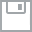
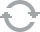
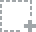
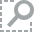
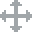
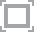
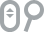
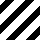
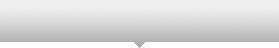
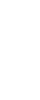
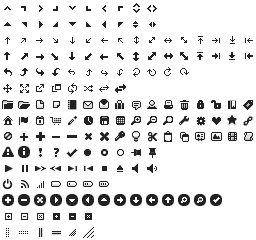
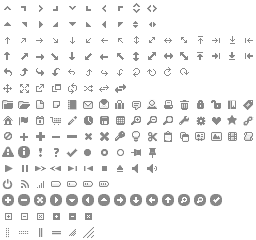
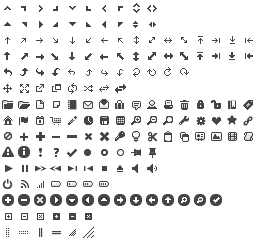
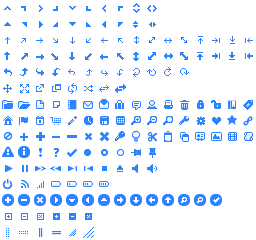
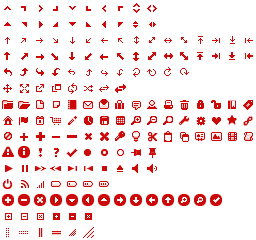
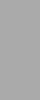
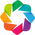
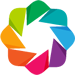

In [128]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

output_notebook()
plot_tfidf = bp.figure(plot_width=900, plot_height=700, title="Bank Tweets (tf-idf)",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_tfidf.scatter(x=tsne_tfidf[:,0], y=tsne_tfidf[:,1],
                    source=bp.ColumnDataSource({
                        "tweet": tweet_texts[:len(tweets)], 
                        "processed": tweet_texts_processed[:len(tweets)]
                    }))

hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"tweet": "@tweet (processed: \"@processed\")"}
show(plot_tfidf)

In [129]:
#K-Means Clustering
from sklearn.cluster import MiniBatchKMeans

num_clusters = 5
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [130]:
for i, tweet in enumerate(tweets):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + tweet + "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")

Cluster 4: Don't get gas at any Sunoco! I got hit with fraud of just about $4,000 charged to my checking. My bank is handling it and life's still good!(distance: 0.952288537922)
Cluster 1: Colleen I can't donate because it declines my card due to a no fraud policy my bank has  I wanna donate @JoshuaDtown @ColleenB123(distance: 0.898993186274)
Cluster 2: @steelyhoops yes but cleared the bank debt of18m with money raised from ticket sales he didn't own ... You know, fraud !(distance: 0.981102709484)
Cluster 2: @prettyannoyed my account dropping $400 spent at Walmart is how the bank knew it was fraud(distance: 0.957973617677)
Cluster 1: So I just got a call from fraud prevention. Yay! Someone got a hold of my information & we don't know where!

Welp. No bank card for a week.(distance: 0.95921568634)


In [131]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print "Cluster %d:" % i
    for j in sorted_centroids[i, :10]:
        print ' %s' % terms[j]
    print()

Cluster 0:
 woodgrove
 unusual
 link
 received
 department
 charges
 alert
 bank
 fraud
 number
()
Cluster 1:
 card
 bank
 fraud
 credit
 debit
 new
 dept
 can
 get
 blocked
()
Cluster 2:
 bank
 fraud
 banking
 account
 money
 central
 like
 dumbest
 latest
 get
()
Cluster 3:
 online
 thanks
 go
 fraud
 bank
 banking
 ok
 hi
 team
 refund
()
Cluster 4:
 don
 system
 fraud
 bank
 store
 banking
 it
 transactions
 cuz
 matter
()


In [ ]:
#LDA
import lda
from sklearn.feature_extraction.text import CountVectorizer

cvectorizer = CountVectorizer(min_df=4, max_features=10000, stop_words='english')
cvz = cvectorizer.fit_transform(tweet_texts_processed)

n_topics = 5
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

In [ ]:
import numpy as np

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

n_top_words = 15
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

In [ ]:
tsne_lda = tsne_model.fit_transform(X_topics[:len(tweets)])

In [ ]:
#retrieve main topic for each tweet, which we'll use to colorize them
doc_topic = lda_model.doc_topic_
lda_keys = []
for i, tweet in enumerate(tweets):
    lda_keys += [doc_topic[i].argmax()]

In [ ]:
#plot tweets to identify separated clusters
plot_lda = bp.figure(plot_width=900, plot_height=700, title="Bank 2015 tweets (LDA)",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], 
                 color=colormap[lda_keys][:len(tweets)], 
                 source=bp.ColumnDataSource({
                    "tweet": tweet_texts[:len(tweets)], 
                    "processed": tweet_texts_processed[:len(tweets)],
                    "topic_key": lda_keys[:len(tweets)]
                }))
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"tweet": "@tweet (processed: \"@processed\" - topic: @topic_key)"}
show(plot_lda)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(','.join(list(tweets)))

In [ ]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()